<a href="https://colab.research.google.com/github/Guilherm0/Clustering/blob/main/GaussianMixturePratica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [ ]:
%%capture
%pip install kmodes

In [ ]:
# Data wrangling
import numpy as np
import pandas as pd

# Dataviz
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance, kelbow_visualizer, silhouette_visualizer

## -- Machine learning -- ##
from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, DBSCAN, MeanShift
from sklearn.cluster import k_means, dbscan, mean_shift, estimate_bandwidth
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

from kmodes.kmodes import KModes            # clustering categorical data
from kmodes.kprototypes import KPrototypes  # clustering mixed data

# Didatic purposes
import string
from ipywidgets import interact

In [ ]:
# https://matplotlib.org/stable/tutorials/introductory/customizing.html
sns.set_theme(
    context='talk',
    style='ticks',
    font_scale=.8,
    palette='tab10',
    rc={
        'figure.figsize': (12,8),
        'axes.grid': True,
        'grid.alpha': .2,
        'axes.titlesize': 'x-large',
        'axes.titleweight': 'bold',
        'axes.titlepad': 20,
    }
)

scatter_kwargs = dict(palette='viridis', alpha=0.8, linewidth=0)

# Gaussian Mixture

In [ ]:
# Simulate clusters
X,y = datasets.make_blobs(n_samples=int(1E3), n_features=2, centers=4, cluster_std=.8, random_state=0)
df = pd.DataFrame(X, columns=list(string.ascii_uppercase[:X.shape[1]]))
df.head()

,A,B
0,-2.256086,7.858356
1,0.568548,3.953328
2,-2.602152,8.418937
3,-2.625338,2.063689
4,2.286564,1.227960


In [ ]:
# Create model
model = GaussianMixture(n_components=4, covariance_type='spherical')
model.fit(X)

GaussianMixture(covariance_type='spherical', n_components=4)

In [ ]:
# Model attributes
model.means_
model.covariances_
model.weights_

array([0.2521594 , 0.25101906, 0.247801  , 0.24902054])

In [ ]:
# Model BIC
model.bic(X)

7475.928561883233

In [ ]:
# Predict labels
model.predict(X)[:5]

array([1, 3, 1, 2, 0])

In [ ]:
# Predict labels' probability
model.predict_proba(X)[:5]

array([[4.47036452e-22, 9.99999993e-01, 1.06690606e-09, 5.43870188e-09],
       [2.57137974e-04, 9.63882315e-07, 1.87001920e-02, 9.81041706e-01],
       [2.49568344e-25, 1.00000000e+00, 9.41302197e-12, 4.11129219e-11],
       [8.71070480e-09, 8.40546996e-12, 9.99980760e-01, 1.92312544e-05],
       [9.99927378e-01, 2.93030421e-19, 9.56574332e-07, 7.16656227e-05]])

In [ ]:
model.means_.T

array([[ 0.91251225, -1.47074945, -1.28890206,  1.9950502 ],
       [ 4.26878154,  2.9161483 ,  7.85197967,  0.85843856]])

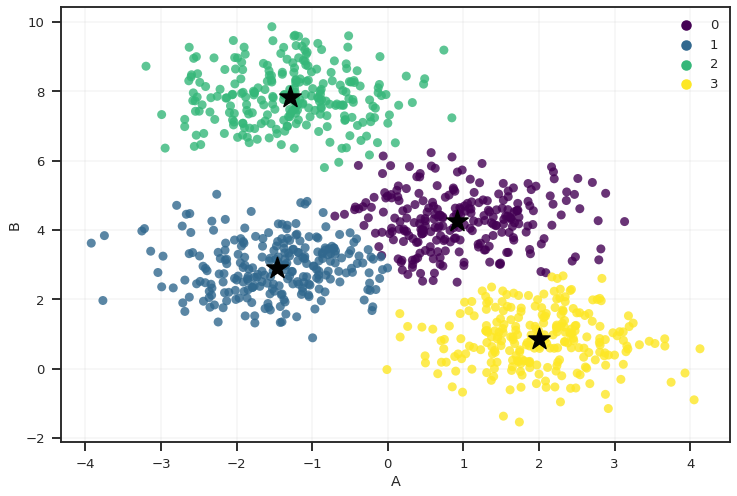

In [ ]:
# Plot
labels = model.predict(X)
ax = sns.scatterplot(data=df, x='A', y='B', hue=labels, **scatter_kwargs)
ax.scatter(*model.means_.T, marker='*', color='black', s=500);

In [ ]:
# Select best model by covariance type and K (Practical Statistics for Data Scientists)
results = []
k_range = range(1,9)
covariance_types = ['full', 'tied', 'diag', 'spherical']

for n_components in k_range:
  for covariance_type in covariance_types:
    mclust = GaussianMixture(n_components=n_components, warm_start=True, covariance_type=covariance_type)
    mclust.fit(X)
    results.append({
      'bic': mclust.bic(X),
      'n_components': n_components,
      'covariance_type': covariance_type,
    })

results = pd.DataFrame(results)
results

,bic,n_components,covariance_type
0,8357.218909,1,full
1,8357.218909,1,tied
2,8679.299153,1,diag
3,8889.310673,1,spherical
4,7976.527656,2,full
5,8165.511057,2,tied
6,8050.082533,2,diag
7,8036.917677,2,spherical
8,7526.397339,3,full
9,7736.189981,3,tied


In [ ]:
results.sort_values('bic').head()

,bic,n_components,covariance_type
13,7419.260030,4,tied
15,7426.425803,4,spherical
17,7442.077500,5,tied
14,7450.139988,4,diag
19,7453.369260,5,spherical


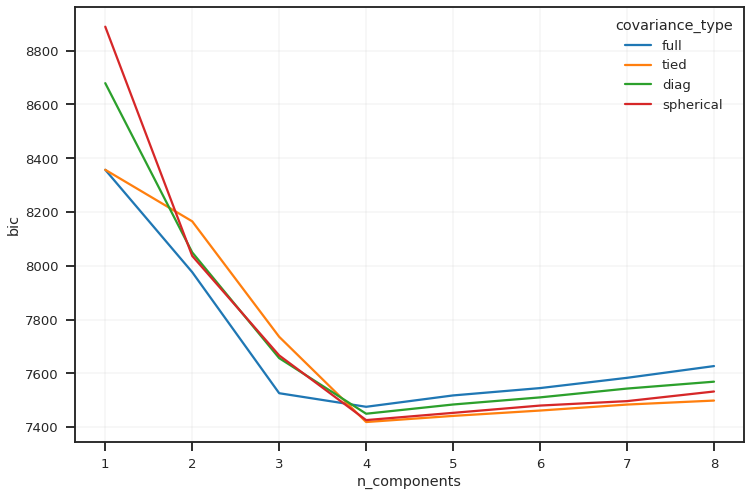

In [ ]:
# Plot
sns.lineplot(data=results, x='n_components', y='bic', hue='covariance_type');